# Telecom Churn Case Study(Machine learning -II)

## Import  Libraries

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing 'variance_inflation_factor' or VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE for RFE selection
from sklearn.feature_selection import RFE

# Importing statsmodels
import statsmodels.api as sm

# Importing the precision recall curve
from sklearn.metrics import precision_recall_curve

# Importing evaluation metrics from scikitlearn 
from sklearn import metrics

from sklearn.decomposition import IncrementalPCA

# To suppress the warnings which will be raised
import warnings
warnings.filterwarnings('ignore')

# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


### DATA UNDERSTANDING

In [354]:

churn = pd.read_csv("train.csv")

In [355]:
churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [356]:
#look at the last 5 rows
churn.tail() 

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,14.96,0.0,0.0,0.00,0.0,0.0,0.00,2.44,7.19,0.00,60.64,89.66,0.00,0.00,0.00,0.0,2.43,0.86,0.00,63.09,96.86,0.00,4.91,3.73,0.00,414.61,290.14,0.0,0.0,0.0,0.0,0.0,0.0,0.00,419.53,293.88,0.00,0.0,0.0,0.00,14.05,1.83,0.0,0.0,0.0,0.00,496.68,392.58,0.00,26.59,33.84,0.00,172.33,223.91,0.00,1.06,0.00,0.00,199.99,257.76,0.00,0.00,0.00,0.00,21.99,11.79,0.0,0.0,0.00,0.0,0.0,0.0,0.00,21.99,11.79,0.00,221.99,269.56,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1,17,13,50,397,512,50,110,130,6/18/2014,7/31/2014,8/31/2014,50,20,130,NaN,7/31/2014,8/21/2014,NaN,7.0,1.0,NaN,25.0,17.0,NaN,6.0,1.0,NaN,1.0,0.0,NaN,135.0,17.0,0.00,244.59,144.31,0.00,0.00,0.00,NaN,21.91,0.00,NaN,60.61,48.00,NaN,0.0,0.0,0,0,0,0,6,1,0,0,0,0,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,265.772,116.54,196.46,232.63,49.53,96.28,48.06,0.00,0.0,0.0,0.00,0.0,0.0,7.18,30.11,9.06,37.53,73.84,47.34,2.01,0.00,0.00,0.0,4.01,0.00,46.73,103.96,56.41,109.36,166.34,223.56,9.98,18.41,0.53,0.0,0.0,0.0,0.0,0.0,0.0,119.34,184.76,224.09,0.00,0.0,0.0,0.13,4.01,0.18,0.0,0.0,0.0,166.21,292.74,280.69,30.48,28.48,23.09,21.78,35.18,28.79,2.38,0.21,0.00,54.64,63.88,51.89,16.63,39.23,66.28,8.96,9.31,17.24,0.0,0.0,0.00,0.0,0.0,0.0,25.59,48.54,83.53,80.24,112.43,136.01,0.0,0.0,0.5,0.00,0.0,0.00,0.00,0.00,0.08,5,11,9,200,31

In [357]:
#check the columns of data
churn.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [358]:
#Checking the numerical columns data distribution statistics
churn.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [359]:
#check dataframe for null and datatype 
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [360]:
# feature type summary
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [361]:
churn.shape

(69999, 172)

### STEP 1: DATA CLEANING 

In [362]:
# Checking for null values
churn.isnull().sum().head()

id                0  
circle_id         0  
loc_og_t2o_mou    702
std_og_t2o_mou    702
loc_ic_t2o_mou    702
dtype: int64

In [363]:
# Checking the null value percentage
churn.isna().sum()/churn.isna().count()*100

id                          0.000000 
circle_id                   0.000000 
loc_og_t2o_mou              1.002871 
std_og_t2o_mou              1.002871 
loc_ic_t2o_mou              1.002871 
last_date_of_month_6        0.000000 
last_date_of_month_7        0.570008 
last_date_of_month_8        1.047158 
arpu_6                      0.000000 
arpu_7                      0.000000 
arpu_8                      0.000000 
onnet_mou_6                 3.954342 
onnet_mou_7                 3.838626 
onnet_mou_8                 5.290076 
offnet_mou_6                3.954342 
offnet_mou_7                3.838626 
offnet_mou_8                5.290076 
roam_ic_mou_6               3.954342 
roam_ic_mou_7               3.838626 
roam_ic_mou_8               5.290076 
roam_og_mou_6               3.954342 
roam_og_mou_7               3.838626 
roam_og_mou_8               5.290076 
loc_og_t2t_mou_6            3.954342 
loc_og_t2t_mou_7            3.838626 
loc_og_t2t_mou_8            5.290076 
loc_og_t2m_m

### Chceking for duplicates

In [364]:
# Checking for the duplicates
churn.drop_duplicates(subset=None, inplace=True)
churn.shape

(69999, 172)

There are no duplicate values

In [365]:
# look at missing value ratio in each column
churn.isnull().sum()*100/churn.shape[0]

id                          0.000000 
circle_id                   0.000000 
loc_og_t2o_mou              1.002871 
std_og_t2o_mou              1.002871 
loc_ic_t2o_mou              1.002871 
last_date_of_month_6        0.000000 
last_date_of_month_7        0.570008 
last_date_of_month_8        1.047158 
arpu_6                      0.000000 
arpu_7                      0.000000 
arpu_8                      0.000000 
onnet_mou_6                 3.954342 
onnet_mou_7                 3.838626 
onnet_mou_8                 5.290076 
offnet_mou_6                3.954342 
offnet_mou_7                3.838626 
offnet_mou_8                5.290076 
roam_ic_mou_6               3.954342 
roam_ic_mou_7               3.838626 
roam_ic_mou_8               5.290076 
roam_og_mou_6               3.954342 
roam_og_mou_7               3.838626 
roam_og_mou_8               5.290076 
loc_og_t2t_mou_6            3.954342 
loc_og_t2t_mou_7            3.838626 
loc_og_t2t_mou_8            5.290076 
loc_og_t2m_m

In [366]:
# some recharge columns have minimum value of 1 while some don't have
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
                 ]

churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


### CHECKING FOR OUTLIERS

In [368]:
# List only the numeric columns
numeric_cols = churn.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=163)


In [369]:
numeric_cols = numeric_cols.drop('churn_probability')

### Identifying Outliers with Interquartile Range (IQR)

In [371]:
Q1 = churn.quantile(0.25)
Q3 = churn.quantile(0.75)
IQR = Q3 - Q1
print(IQR.sort_values(ascending=False))

id                    34999.0000
aon                   1345.0000 
total_rech_amt_8      346.0000  
total_og_mou_7        337.1350  
total_og_mou_8        332.1850  
total_rech_amt_7      330.0000  
total_og_mou_6        329.5250  
total_rech_amt_6      328.0000  
arpu_8                285.8140  
arpu_7                278.6555  
arpu_6                277.2100  
total_ic_mou_6        212.4300  
total_ic_mou_8        211.4200  
total_ic_mou_7        208.1300  
offnet_mou_6          198.1300  
offnet_mou_8          197.7700  
offnet_mou_7          195.3900  
loc_ic_mou_6          177.6950  
loc_ic_mou_8          175.2500  
loc_ic_mou_7          172.8200  
av_rech_amt_data_6    170.0000  
av_rech_amt_data_8    168.0000  
av_rech_amt_data_7    160.0000  
max_rech_data_8       154.0000  
max_rech_data_6       152.0000  
max_rech_data_7       152.0000  
std_og_mou_7          151.6450  
loc_og_mou_6          150.6450  
std_og_mou_8          149.0150  
loc_og_mou_8          148.3775  
loc_og_mou

 We can create new feature as total_rech_amt_data using total_rech_data and av_rech_amt_data to capture amount utilized by customer for data.

 Also as the minimum value is 1 we can impute the NA values by 0, Considering there were no recharges done by the customer.

In [372]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
churn.loc[churn.total_rech_data_6.isnull() & churn.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbers that month.

In [373]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

In [374]:
# impute missing values with 0
churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))

In [375]:
# now we have to  make sure the values are imputed correctly for that we can check "Missing value ratio"
churn[zero_impute].isnull().sum()*100/churn.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64

In [376]:
# now we can check the "statistics Summary"
churn[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.619309,0.683981,0.697867,48.395787,51.415168,51.782975,31.748339,32.260075,32.986614
std,1.762010,1.943193,1.973434,126.923180,133.246541,131.291162,77.519536,78.069163,78.808337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,8.000000,17.000000,23.000000,8.000000,14.000000,17.000000
max,61.000000,54.000000,60.000000,5920.000000,4365.000000,4076.000000,1555.000000,1555.000000,1555.000000


In [377]:
# now we can create some column name list by there types using description of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',             
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'             
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'             
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#ID cols: 2
#Date cols:9
#Numeric cols:155
#Category cols:6
True


In [378]:
# drop id and date columns
churn = churn.drop(id_cols + date_cols, axis=1)
#check the shape again
churn.shape

(69999, 161)

In [379]:
# replace missing values with '-1' in categorical columns
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

In [380]:
# missing value ratio
churn[cat_cols].isnull().sum()*100/churn.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

Droping variables with more than 70% of missing values (we can call it as threshold )

In [381]:
initial_cols = churn.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':churn.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,onnet_mou_6,True
7,onnet_mou_7,True
8,onnet_mou_8,True
9,offnet_mou_6,True


In [382]:
# now we can drop  some more columns
churn = churn.loc[:, include_cols]

dropped_cols = churn.shape[1] - initial_cols
dropped_cols

-12

In [383]:
#rechecking the shape of a dataframe
churn.shape

(69999, 149)

In [384]:
# rechecking the missing values for how many missing values has left
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou        1.002871
std_og_t2o_mou        1.002871
loc_ic_t2o_mou        1.002871
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.954342
onnet_mou_7           3.838626
onnet_mou_8           5.290076
offnet_mou_6          3.954342
offnet_mou_7          3.838626
offnet_mou_8          5.290076
roam_ic_mou_6         3.954342
roam_ic_mou_7         3.838626
roam_ic_mou_8         5.290076
roam_og_mou_6         3.954342
roam_og_mou_7         3.838626
roam_og_mou_8         5.290076
loc_og_t2t_mou_6      3.954342
loc_og_t2t_mou_7      3.838626
loc_og_t2t_mou_8      5.290076
loc_og_t2m_mou_6      3.954342
loc_og_t2m_mou_7      3.838626
loc_og_t2m_mou_8      5.290076
loc_og_t2f_mou_6      3.954342
loc_og_t2f_mou_7      3.838626
loc_og_t2f_mou_8      5.290076
loc_og_t2c_mou_6      3.954342
loc_og_t2c_mou_7      3.838626
loc_og_t2c_mou_8      5.290076
loc_og_mou_6          3.954342
loc_og_mou_7          3.838626
loc_og_m

In [385]:
num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [386]:
#imputing with meadian for num_cols
churn[num_cols] = churn[num_cols].apply(lambda x: x.fillna(x.median()))

In [387]:
#again checking for the missing values
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

In churn prediction, we assume that there are three phases of customer lifecycle :

- The ‘good & action’ phase [Month 6 & 7]
- The ‘churn’ phase [Month 8]
In this case, since we are working over a three-month window, the first two months are the ‘good & action’ phase, the third month is the ‘churn’ phase.

In [388]:
# List only the numeric columns
numeric_cols = churn.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=149)


In [389]:
numeric_cols = numeric_cols.drop('churn_probability')

In [390]:
churn.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00

### Step 2:

### Filter high-value customers

Here we can take good phase ( month 6 and 7) data to get high value customers

In [391]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

add total data recharge and total recharge to get total combined recharge amount for a month

In [392]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [393]:
# calculate average recharge done by customer in June and July
churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

In [394]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))


Recharge amount at 70th percentile: 477.5


In [395]:
churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0,0.0,0.0,77.0,65.0,71.0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,-1.0,1.0,-1.0,710,0.0,0.0,0.0,0,0.0,145.0,0.0,290.0,145.0
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31

In [396]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)


In [397]:
churn_filtered.shape

(21013, 154)

In [398]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)


In [399]:
churn_filtered.shape

(21013, 149)

 hear we're left with 21,013 rows  and 149 columns after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

# Step 3:

# Derive churn

Derive churn means hear we are using 8 month(The ‘churn’ phase) data , To get the target variable(In this case stydy they did not provide any target variable we have to derive it from churn phase data)
For that, we need to find the derive churn variable using total_ic_mou_8,total_og_mou_8,vol_2g_mb_8 and vol_3g_mb_8 attributes

In [400]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']
churn_filtered[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_8  21013 non-null  float64
 1   total_og_mou_8  21013 non-null  float64
 2   vol_2g_mb_8     21013 non-null  float64
 3   vol_3g_mb_8     21013 non-null  float64
dtypes: float64(4)
memory usage: 656.8 KB


0    27.534679
1    2.484321 
Name: churn_probability, dtype: float64


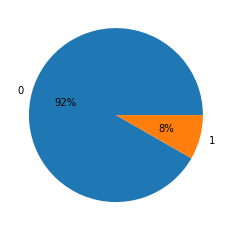

In [401]:
# lets find out churn/non churn percentage
print((churn_filtered['churn_probability'].value_counts()/len(churn))*100)
plt.pie(churn_filtered['churn_probability'].value_counts(),labels = ['0','1'], autopct='%.0f%%')
plt.show()

#### ***As we can see that 90% of the customers do not churn, there is a possibility of class imbalance*** 
Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _8) can be dropped forn the dataset.


We can still clean the data by few possible columns relating to the good phase.

As we derived few columns in the good phase earlier, we can drop those related columns during creation.

In [402]:
churn_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.

Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.

In [403]:
# creating a list of column names for each month
mon_6_cols = [col for col in churn_filtered.columns if '_6' in col]
mon_7_cols = [col for col in churn_filtered.columns if '_7' in col]
mon_8_cols = [col for col in churn_filtered.columns if '_8' in col]

In [404]:
mon_7_cols

['arpu_7',
 'onnet_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'og_others_7',
 'total_og_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2o_mou_7',
 'std_ic_mou_7',
 'total_ic_mou_7',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7',
 'total_rech_num_7',
 'max_rech_amt_7',
 'last_day_rch_amt_7',
 'max_rech_data_7',
 'vol_2g_mb_7',
 'vol_3g_mb_7',
 'night_pck_user_7',
 'monthly_2g_7',
 'sachet_2g_7',
 'monthly_3g_7',
 'sachet_3g_7',
 'fb_user_7']

In [405]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
churn_corr = churn_filtered.corr()
churn_corr.loc[:,:] = np.tril(churn_corr, k=-1)
churn_corr = churn_corr.stack()
churn_corr
churn_corr[(churn_corr > 0.80) | (churn_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8               0.958953
fb_user_6           night_pck_user_6     0.957744
isd_og_mou_8        isd_og_mou_7         0.956635
fb_user_7           night_pck_user_7     0.955499
fb_user_8           night_pck_user_8     0.954382
isd_og_mou_7        isd_og_mou_6         0.936012
isd_og_mou_8        isd_og_mou_6         0.934200
total_ic_mou_6      loc_ic_mou_6         0.901348
total_ic_mou_8      loc_ic_mou_8         0.898511
sachet_2g_8         total_rech_data_8    0.897476
total_ic_mou_7      loc_ic_mou_7         0.883143
std_og_t2t_mou_7    onnet_mou_7          0.861786
std_og_t2t_mou_6    onnet_mou_6          0.860921
std_og_t2t_mou_8    onnet_mou_8          0.858635
std_og_t2m_mou_7    offnet_mou_7         0.857958
std_og_t2m_mou_8    offnet_mou_8         0.855066
total_og_mou_8      std_og_mou_8         0.850737
total_og_mou_7      std_og_mou_7         0.850341
loc_ic_mou_6        loc_ic_t2m_mou_6     0.846101
loc_og_mou_8        loc_og_mou_7         0.842607


In [406]:
col_to_drop=['fb_user_6','fb_user_7','total_ic_mou_6','total_ic_mou_7',               
               'std_og_t2t_mou_7','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
churn_filtered.drop(col_to_drop, axis=1, inplace=True)

In [407]:
# The curent dimension of the dataset after dropping few unwanted columns
churn_filtered.shape

(21013, 135)

In [408]:

# creating a new variable 'tenure'
churn_filtered['tenure'] = (churn_filtered['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
churn_filtered.drop('aon',axis=1, inplace=True)

## Step 4: EDA

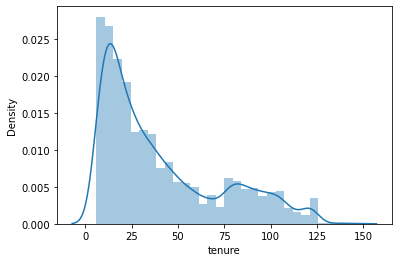

In [409]:
# Checking the distribution of he tenure variable

sns.distplot(churn_filtered['tenure'],bins=30)
plt.show()

In [410]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_filtered['tenure_range'] = pd.cut(churn_filtered['tenure'], tn_range, labels=tn_label)
churn_filtered['tenure_range'].head()

0    1-2 Yrs
1    1-2 Yrs
2    1-2 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

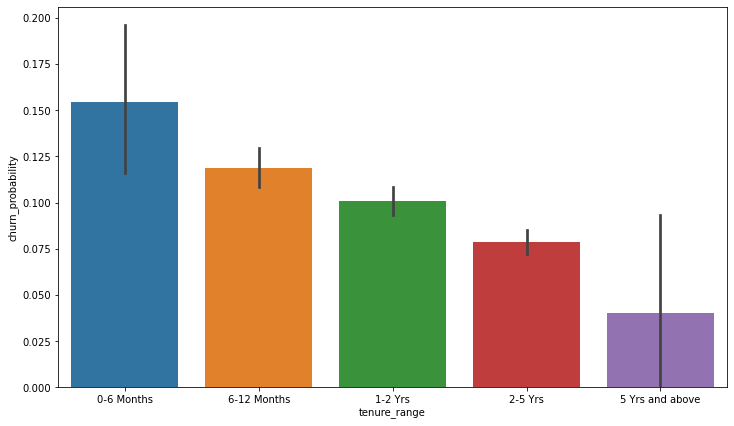

In [411]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=churn_filtered)
plt.show()

It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two separate averages, lets take an average to these two and drop the other columns

In [412]:
churn_filtered["avg_arpu_6_7"]= (churn_filtered['arpu_6']+churn_filtered['arpu_7'])/2
churn_filtered['avg_arpu_6_7'].head()

0    184.4495 
1    478.9215 
2    1018.2270
3    362.0215 
4    370.7370 
Name: avg_arpu_6_7, dtype: float64

In [413]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

churn_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
churn_filtered.shape

(21013, 135)

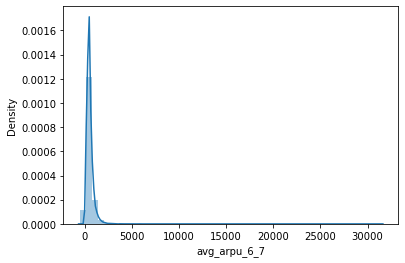

In [414]:
# Visualizing the column created
sns.distplot(churn_filtered['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

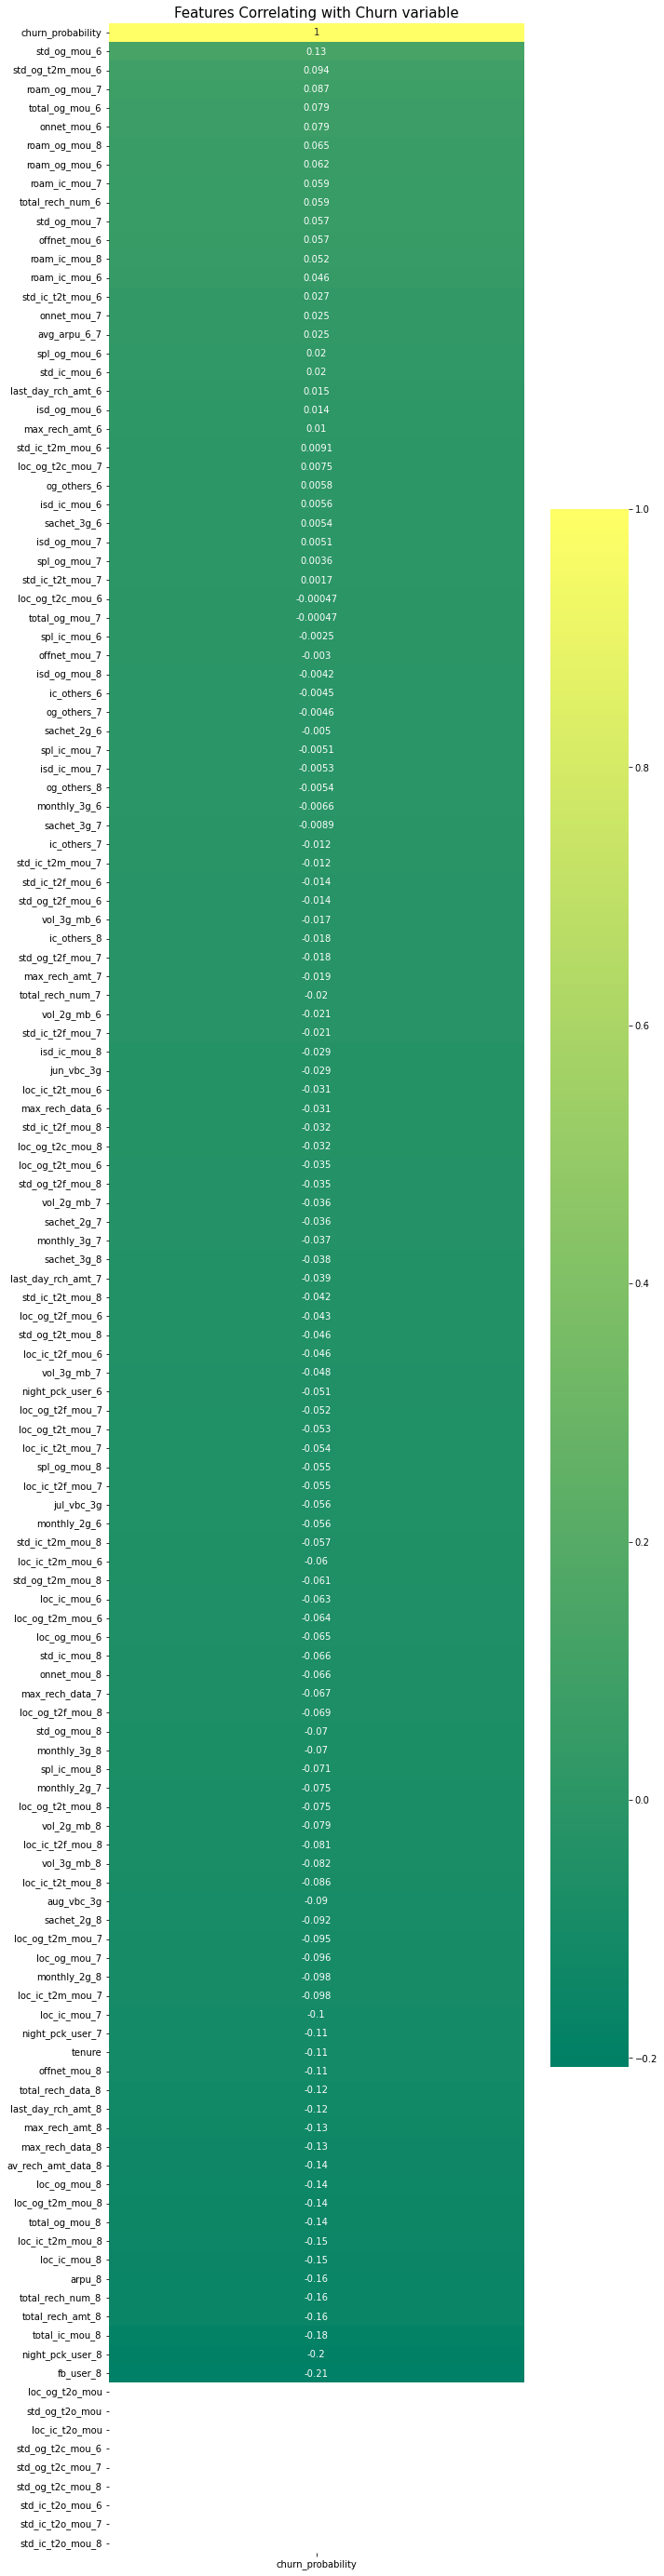

In [415]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(churn_filtered.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

In [416]:
churn_filtered.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_8', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'tenure', 'tenure_range',
       'avg_arpu_6_7'],
      dtype='object', length=135)

- Avg Outgoing Calls & calls on roaming for 6th & 7th months are positively correlated with churn.
- Avg Revenue, No. of Recharge for 8th month has negative correlation with churn.

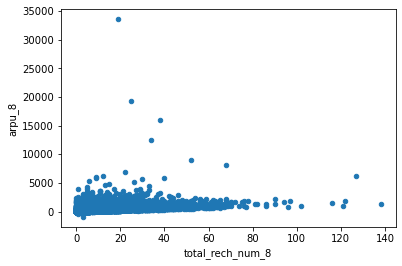

In [417]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
churn_filtered[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

In [418]:
# Creating categories for month 8 column totalrecharge and their count
churn_filtered['total_rech_data_group_8']=pd.cut(churn_filtered['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
churn_filtered['total_rech_num_group_8']=pd.cut(churn_filtered['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     10729
No_Recharge        9833 
10-25_Recharges    421  
>25_Recharges      30   
Name: total_rech_data_group_8, dtype: int64


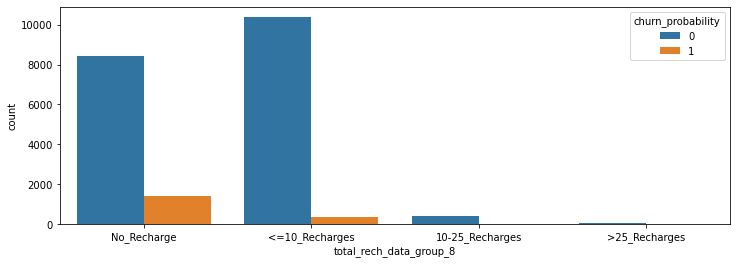

					Distribution of total_rech_num_8 variable
 <=10_Recharges     13533
10-25_Recharges    5829 
>25_Recharges      1255 
No_Recharge        396  
Name: total_rech_num_group_8, dtype: int64


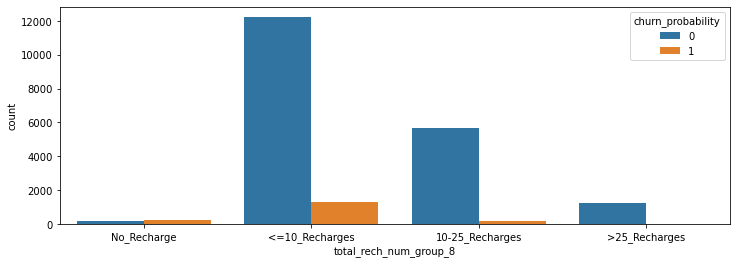

In [419]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=churn_filtered,x="total_rech_data_group_8",hue="churn_probability")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",churn_filtered['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=churn_filtered,x="total_rech_num_group_8",hue="churn_probability")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",churn_filtered['total_rech_num_group_8'].value_counts())
plt.show()

As the number of recharge rate increases, the churn rate decreases clearly.

In [420]:
churn_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1, inplace=True)

In [421]:
churn_filtered.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [422]:
churn_filtered.shape

(21013, 56)

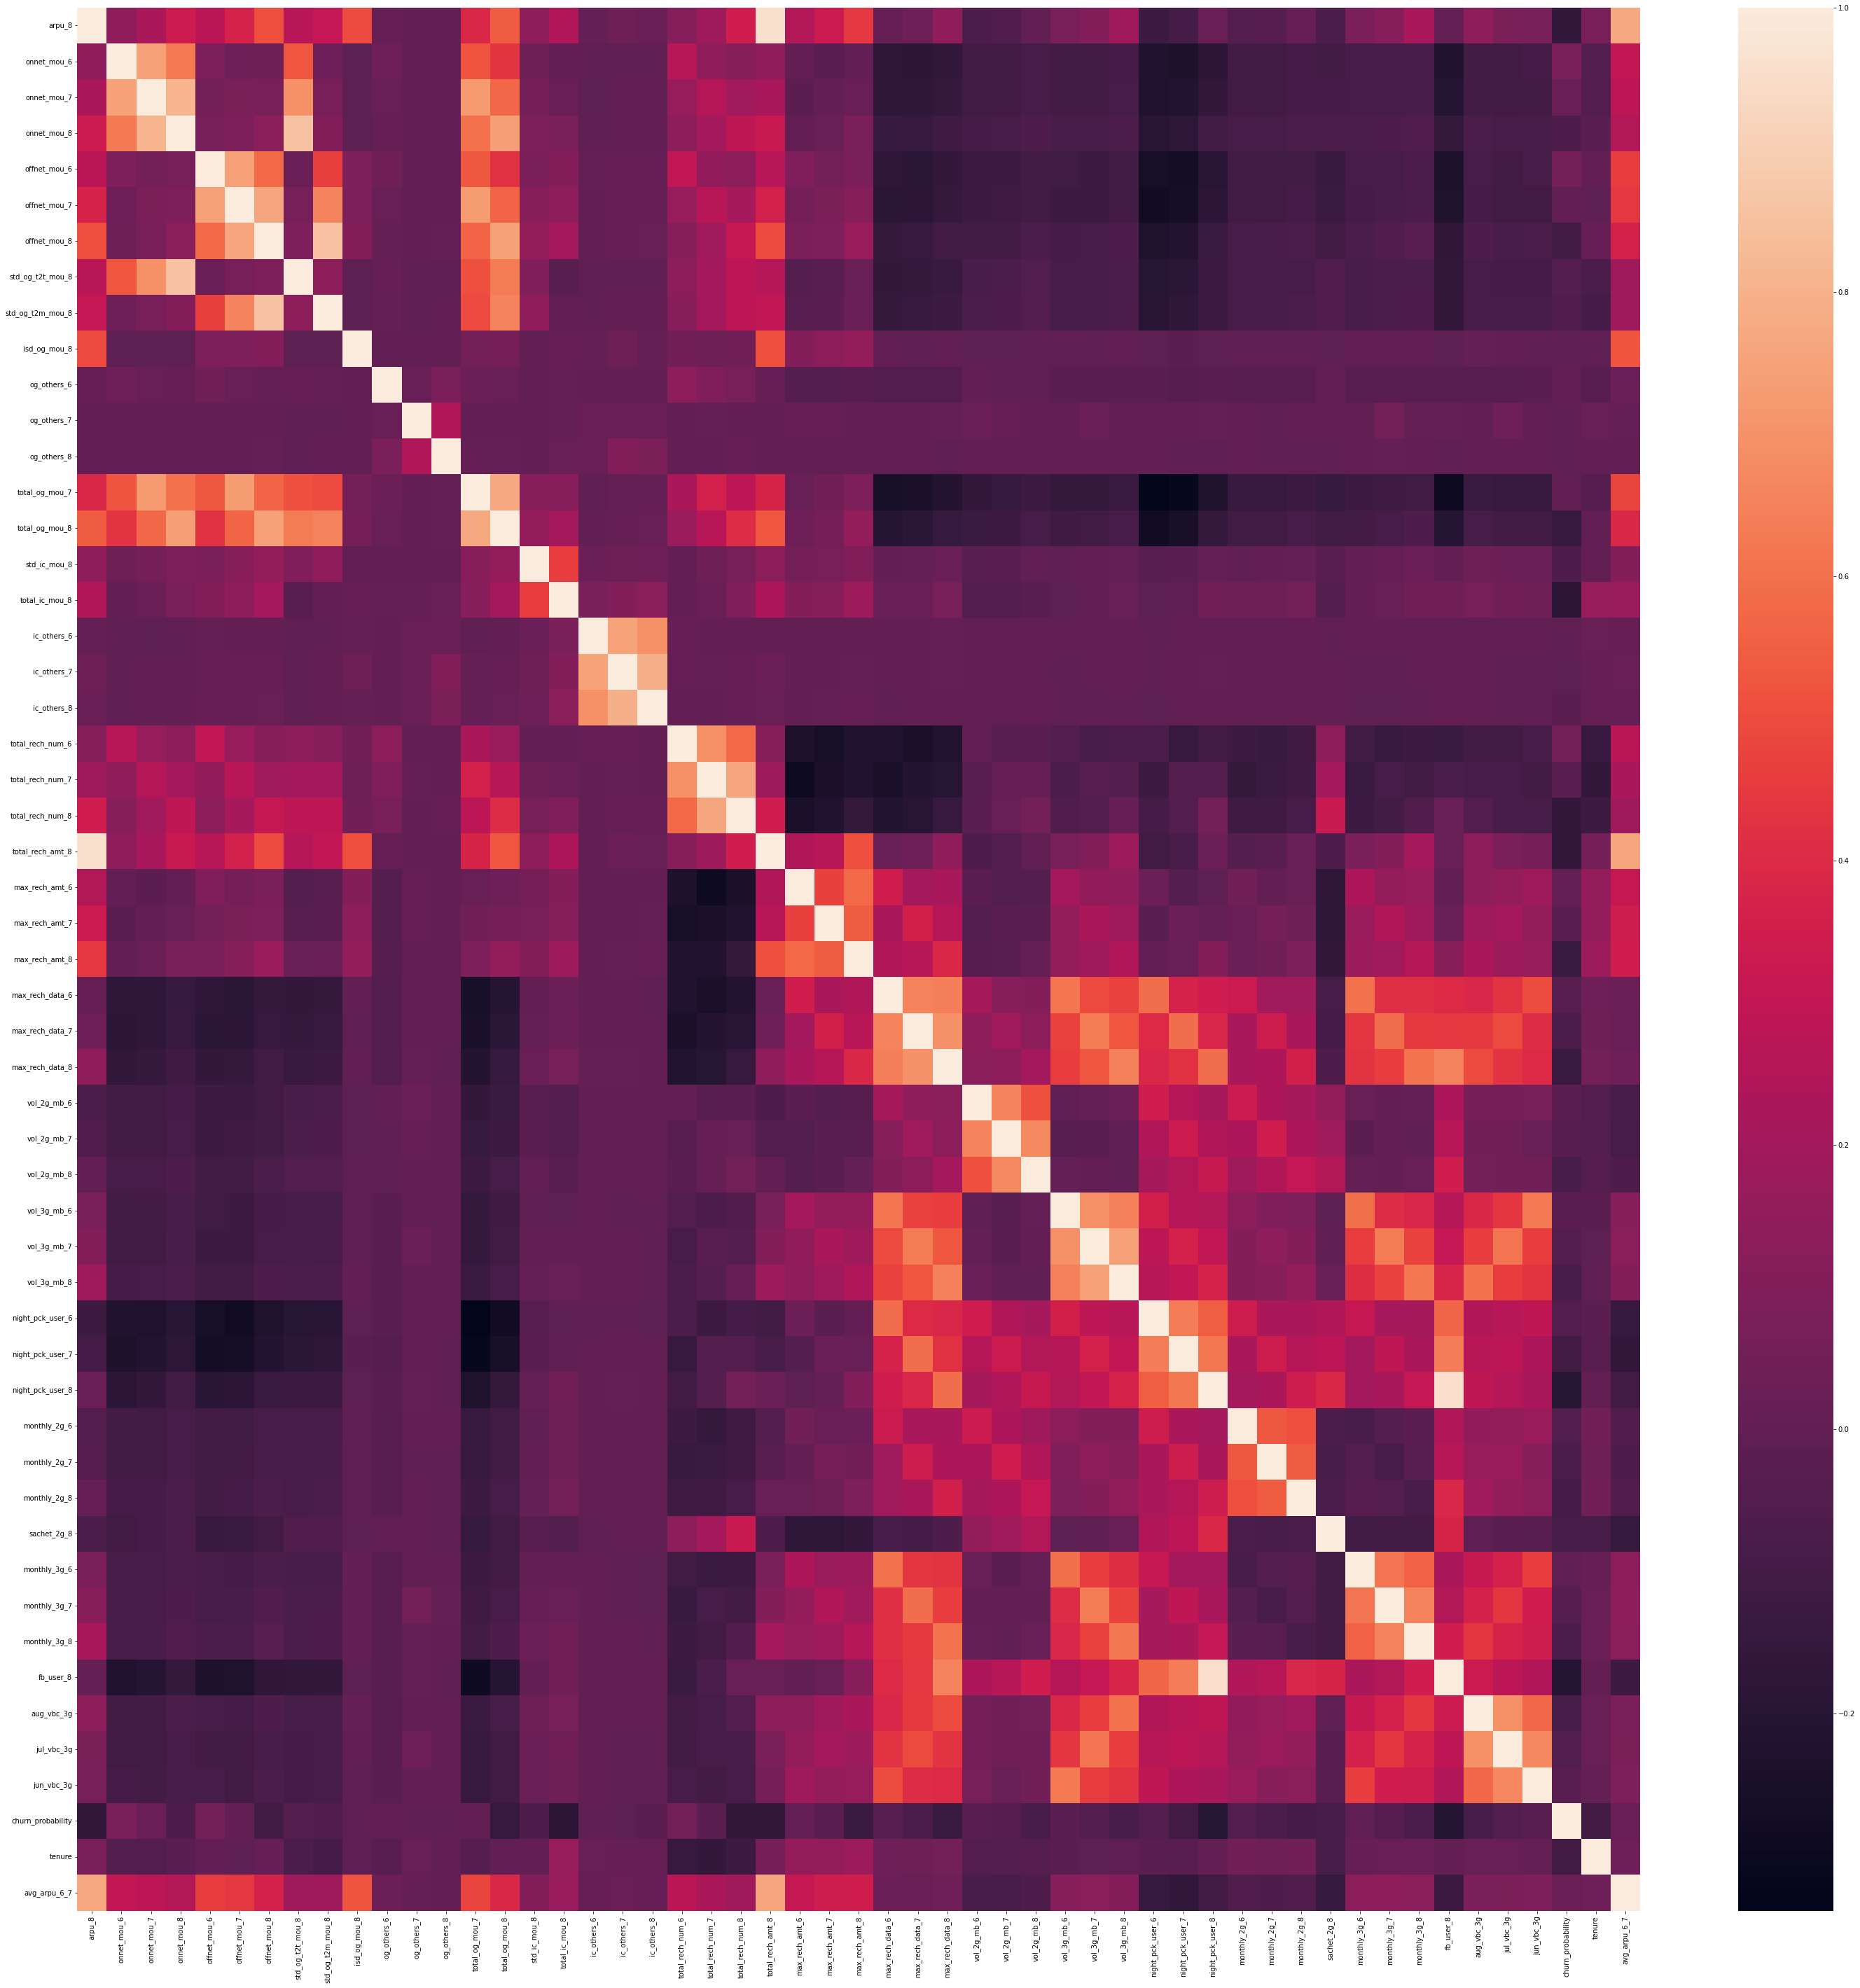

In [423]:
plt.figure(figsize = (50, 50))
sns.heatmap(churn_filtered.corr())
plt.show()

In [424]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   arpu_8                   21013 non-null  float64 
 1   onnet_mou_6              21013 non-null  float64 
 2   onnet_mou_7              21013 non-null  float64 
 3   onnet_mou_8              21013 non-null  float64 
 4   offnet_mou_6             21013 non-null  float64 
 5   offnet_mou_7             21013 non-null  float64 
 6   offnet_mou_8             21013 non-null  float64 
 7   std_og_t2t_mou_8         21013 non-null  float64 
 8   std_og_t2m_mou_8         21013 non-null  float64 
 9   isd_og_mou_8             21013 non-null  float64 
 10  og_others_6              21013 non-null  float64 
 11  og_others_7              21013 non-null  float64 
 12  og_others_8              21013 non-null  float64 
 13  total_og_mou_7           21013 non-null  float64 
 14  total_

In [425]:
churn_filtered.drop(['total_rech_data_group_8','total_rech_num_group_8',] , axis=1, inplace=True)

In [426]:
churn_filtered.shape

(21013, 54)

In [427]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   arpu_8             21013 non-null  float64 
 1   onnet_mou_6        21013 non-null  float64 
 2   onnet_mou_7        21013 non-null  float64 
 3   onnet_mou_8        21013 non-null  float64 
 4   offnet_mou_6       21013 non-null  float64 
 5   offnet_mou_7       21013 non-null  float64 
 6   offnet_mou_8       21013 non-null  float64 
 7   std_og_t2t_mou_8   21013 non-null  float64 
 8   std_og_t2m_mou_8   21013 non-null  float64 
 9   isd_og_mou_8       21013 non-null  float64 
 10  og_others_6        21013 non-null  float64 
 11  og_others_7        21013 non-null  float64 
 12  og_others_8        21013 non-null  float64 
 13  total_og_mou_7     21013 non-null  float64 
 14  total_og_mou_8     21013 non-null  float64 
 15  std_ic_mou_8       21013 non-null  float64 
 16  tota

In [428]:
churn_filtered.drop(['tenure_range'] , axis=1, inplace=True)

In [429]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   arpu_8             21013 non-null  float64
 1   onnet_mou_6        21013 non-null  float64
 2   onnet_mou_7        21013 non-null  float64
 3   onnet_mou_8        21013 non-null  float64
 4   offnet_mou_6       21013 non-null  float64
 5   offnet_mou_7       21013 non-null  float64
 6   offnet_mou_8       21013 non-null  float64
 7   std_og_t2t_mou_8   21013 non-null  float64
 8   std_og_t2m_mou_8   21013 non-null  float64
 9   isd_og_mou_8       21013 non-null  float64
 10  og_others_6        21013 non-null  float64
 11  og_others_7        21013 non-null  float64
 12  og_others_8        21013 non-null  float64
 13  total_og_mou_7     21013 non-null  float64
 14  total_og_mou_8     21013 non-null  float64
 15  std_ic_mou_8       21013 non-null  float64
 16  total_ic_mou_8     210

In [430]:
churn_rate = (sum(churn_filtered["churn_probability"])/len(churn_filtered["churn_probability"].index))*100
churn_rate

8.275829248560415

## Step 5: Split Data Into Train and Test Data

In [431]:
churn_filtered.shape

(21013, 53)

In [432]:
# divide data into train and test
X = churn_filtered.drop("churn_probability", axis = 1)
y = churn_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [433]:
# print shapes of train and test sets
X_train.shape

(15759, 52)

In [434]:
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15759,)
(5254, 52)
(5254,)


## Step 6 : Scaling the Data

In [435]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
13528,553.107,597.83,448.53,594.29,149.26,175.73,299.99,569.78,194.28,0.00,2.31,0.0,0.0,567.31,811.06,20.54,74.66,0.00,0.00,0.00,10,10,9,677,128,110,150,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,99.0,533.9885
7183,199.111,364.79,617.33,51.71,124.69,258.86,40.08,0.00,0.00,0.00,0.00,0.0,0.0,843.16,0.00,0.00,0.00,0.00,0.00,0.00,19,27,5,180,36,50,50,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,37.0,520.9410
14666,267.706,84.68,117.61,87.43,552.86,510.43,383.46,3.40,30.44,1.55,0.00,0.0,0.0,628.04,470.89,77.16,679.71,3.83,5.28,13.16,2,6,2,200,150,215,200,152.0,152.0,152.0,17.59,25.76,42.74,495.46,397.32,289.58,0.0,0.0,0.0,0,0,0,1,0,0,0,1.0,197.37,288.6,185.75,93.0,397.1430
17922,409.262,636.51,728.43,700.23,177.04,137.53,162.48,694.38,135.54,0.00,0.00,0.0,0.0,865.96,862.88,18.84,25.21,0.00,0.00,0.00,11,10,11,596,110,110,130,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,12.0,444.9220
5165,293.627,739.41,185.51,66.08,481.24,673.68,534.98,53.94,488.14,0.00,0.00,0.0,0.0,861.13,547.49,10.98,24.11,0.00,0.00,0.00,12,13,6,360,110,110,130,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,32.0,470.9800


In [436]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15759 entries, 13528 to 20561
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   arpu_8            15759 non-null  float64
 1   onnet_mou_6       15759 non-null  float64
 2   onnet_mou_7       15759 non-null  float64
 3   onnet_mou_8       15759 non-null  float64
 4   offnet_mou_6      15759 non-null  float64
 5   offnet_mou_7      15759 non-null  float64
 6   offnet_mou_8      15759 non-null  float64
 7   std_og_t2t_mou_8  15759 non-null  float64
 8   std_og_t2m_mou_8  15759 non-null  float64
 9   isd_og_mou_8      15759 non-null  float64
 10  og_others_6       15759 non-null  float64
 11  og_others_7       15759 non-null  float64
 12  og_others_8       15759 non-null  float64
 13  total_og_mou_7    15759 non-null  float64
 14  total_og_mou_8    15759 non-null  float64
 15  std_ic_mou_8      15759 non-null  float64
 16  total_ic_mou_8    15759 non-null  fl

In [437]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [438]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [439]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
13528,0.043460,0.081043,0.054982,0.059564,0.017849,0.029850,0.021417,0.071094,0.013927,0.000000,0.003788,0.0,0.0,0.068469,0.057755,0.005437,0.015553,0.000000,0.00000,0.000000,0.058824,0.072464,0.065217,0.014938,0.031920,0.033343,0.033715,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.673913,0.030909
7183,0.033196,0.049452,0.075674,0.005183,0.014911,0.043970,0.002861,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.101762,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.111765,0.195652,0.036232,0.003972,0.008978,0.015156,0.011238,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.224638,0.030500
14666,0.035185,0.011479,0.014417,0.008763,0.066113,0.086703,0.027376,0.000424,0.002182,0.000427,0.000000,0.0,0.0,0.075799,0.033532,0.020424,0.141594,0.002849,0.00353,0.010877,0.011765,0.043478,0.014493,0.004413,0.037406,0.065171,0.044954,0.097749,0.097749,0.097749,0.00171,0.003272,0.003844,0.010833,0.014117,0.009641,0.5,0.5,0.5,0.0,0.0,0.0,0.022727,0.0,0.0,0.0,1.0,0.015281,0.031487,0.016635,0.630435,0.026618
17922,0.039289,0.086286,0.089293,0.070182,0.021171,0.023361,0.011600,0.086641,0.009716,0.000000,0.000000,0.0,0.0,0.104513,0.061445,0.004987,0.005252,0.000000,0.00000,0.000000,0.064706,0.072464,0.079710,0.013151,0.027431,0.033343,0.029220,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.043478,0.028116
5165,0.035937,0.100236,0.022740,0.006623,0.057548,0.114432,0.038193,0.006730,0.034992,0.000000,0.000000,0.0,0.0,0.103930,0.038987,0.002906,0.005022,0.000000,0.00000,0.000000,0.070588,0.094203,0.043478,0.007944,0.027431,0.033343,0.029220,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.188406,0.028933


As there are many variables we will start the process of dropping variables after doing the RFE

## Step 7. Data Modeling and Model Evaluation 

### PCA

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [441]:
X_train.shape

(16810, 52)

In [442]:
pca = PCA(random_state=42)

In [443]:
pca.fit(X_train)

PCA(random_state=42)

In [444]:
pca.components_

array([[-9.90426696e-03, -7.99182337e-02, -9.74727314e-02, ...,
         1.69848926e-01,  4.35447656e-05, -8.48816798e-03],
       [ 2.89311095e-01,  1.37346355e-01,  1.94653867e-01, ...,
         4.85641414e-02,  1.14273988e-05,  2.28091894e-01],
       [ 2.09177223e-01, -3.55776054e-01, -4.36148266e-01, ...,
        -8.86666119e-03,  2.99066021e-03,  1.33293061e-01],
       ...,
       [-1.38028760e-05, -2.34674783e-05,  4.40883678e-05, ...,
        -4.15145876e-05, -5.35559625e-05,  2.20451579e-05],
       [ 1.51530538e-05,  1.58107116e-05,  8.66603192e-05, ...,
        -1.68771451e-05, -6.33433153e-05, -1.55387058e-04],
       [ 3.29090533e-06, -1.00170417e-05, -3.46873775e-05, ...,
         4.05847431e-06, -1.46183671e-04, -7.30428886e-06]])

### Analysing the explained variance ratio

In [445]:
pca.explained_variance_ratio_

array([3.30757137e-01, 2.49757152e-01, 8.57094342e-02, 6.38745202e-02,
       4.43347508e-02, 3.43096102e-02, 3.36099665e-02, 3.05610553e-02,
       2.77727739e-02, 1.67762370e-02, 1.36537701e-02, 1.30483677e-02,
       7.50058659e-03, 6.74043417e-03, 6.28704581e-03, 5.68578769e-03,
       4.89873530e-03, 4.80169987e-03, 4.13830502e-03, 3.68999461e-03,
       2.31278963e-03, 2.23161812e-03, 1.89021336e-03, 1.48362031e-03,
       1.39183073e-03, 7.91994641e-04, 7.36442586e-04, 4.13517861e-04,
       3.46617688e-04, 1.68197691e-04, 1.23655371e-04, 8.38021042e-05,
       7.59094956e-05, 1.70732341e-05, 7.58275541e-06, 6.42388188e-06,
       3.60772927e-06, 3.11660159e-06, 1.79652537e-06, 1.54214163e-06,
       6.49773995e-07, 3.99551309e-07, 7.44145110e-08, 6.30229861e-08,
       2.30964343e-08, 1.78796157e-08, 1.60708675e-08, 1.42497337e-08,
       8.65279282e-09, 7.59070205e-09, 6.80550174e-09, 2.22153607e-09])

In [446]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

## SCREE PLOT 

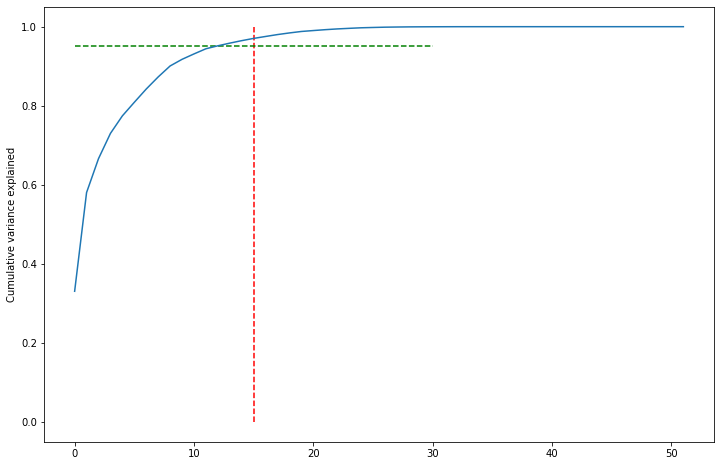

In [447]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

we can use IncrementalPCA for the best result

Almost 95% of the variance can be explained by 20 variables

In [448]:
pca_final = IncrementalPCA(n_components=20)

In [449]:
df_train_pca = pca_final.fit_transform(X_train)

In [450]:
df_train_pca.shape

(16810, 20)

In [451]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [452]:
corrmat.shape

(20, 20)

In [453]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(4203, 20)

## Applying logistic regression on the Principal components

In [454]:
learner_pca = LogisticRegression()

In [455]:
model_pca = learner_pca.fit(df_train_pca, y_train)

## Making predictions on the test set


In [456]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [457]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

### Confusion matrix, Sensitivity and Specificity


In [458]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [459]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

[[3834   40]
 [ 278   51]]


In [460]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [461]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9243397573162027
Sensitivity:- 0.15501519756838905
Specificity:- 0.9896747547754259


## Making predictions on the train set

In [462]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [463]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'0.87'

### Confusion matrix, Sensitivity and Specificity


In [464]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [465]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
print(confusion)

[[15266   134]
 [ 1170   240]]


In [466]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [467]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, pred_probs_train1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9224271267102915
Sensitivity:- 0.1702127659574468
Specificity:- 0.9912987012987013


## Decision Tree with PCA

In [468]:
from sklearn.tree import DecisionTreeClassifier

In [469]:
dt = DecisionTreeClassifier(random_state=42)

In [470]:
from sklearn.model_selection import GridSearchCV

In [471]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [472]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [473]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [474]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.132898,0.002851,0.004735,3.259732e-03,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,59
1,0.125165,0.007774,0.001995,7.059600e-04,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 150}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,59
2,0.129153,0.007774,0.001995,4.256623e-07,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,59
3,0.128406,0.009014,0.001496,4.981762e-04,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 50}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,59
4,0.123918,0.008818,0.001247,4.316395e-04,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 150}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,59


In [475]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
55,0.405914,0.020083,0.002493,8.637602e-04,10,50,150,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}",0.922436,0.923864,0.926226,0.921228,0.923438,0.001860,1
70,0.442317,0.035496,0.001995,1.192093e-07,20,50,150,"{'max_depth': 20, 'min_samples_leaf': 50, 'min_samples_split': 150}",0.922436,0.923864,0.926226,0.921228,0.923438,0.001860,1
49,0.464009,0.016040,0.001995,4.460403e-07,10,10,150,"{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 150}",0.922198,0.922674,0.925036,0.923132,0.923260,0.001077,3
64,0.561996,0.062920,0.001994,2.665601e-07,20,10,150,"{'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 150}",0.922198,0.922674,0.925036,0.923132,0.923260,0.001077,3
54,0.407909,0.017144,0.001995,4.256623e-07,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.923150,0.922912,0.921704,0.922656,0.922606,0.000549,5


In [476]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=42)

In [477]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [478]:
dt_best.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [479]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [480]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [481]:
evaluate_model(dt_best)

Train Accuracy : 0.9375371802498513
Train Confusion Matrix:
[[15103   297]
 [  753   657]]
--------------------------------------------------
Test Accuracy : 0.9257673090649536
Test Confusion Matrix:
[[3765  109]
 [ 203  126]]


##  Random Forest with PCA

In [482]:
from sklearn.ensemble import RandomForestClassifier

In [483]:
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

7


In [484]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=7, random_state=100, oob_score=True, verbose=1)

In [485]:
rf.fit(df_train_pca, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished


RandomForestClassifier(max_depth=4, max_features=7, oob_score=True,
                       random_state=100, verbose=1)

In [486]:
rf.oob_score_

0.9181439619274242

In [487]:
from sklearn.metrics import plot_roc_curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


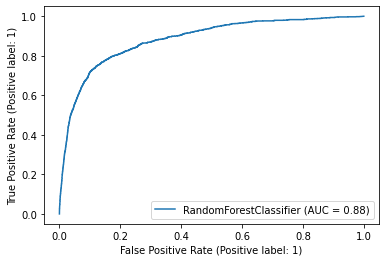

In [488]:
plot_roc_curve(rf, df_train_pca, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [489]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [490]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [491]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [492]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [493]:
grid_search.best_score_

0.9174301424279001

In [494]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [495]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [496]:
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [497]:
evaluate_model(rfc_model)

Train Accuracy : 0.9191552647233789
Train Confusion Matrix:
[[15385    15]
 [ 1344    66]]
--------------------------------------------------
Test Accuracy : 0.9221984296930764
Test Confusion Matrix:
[[3868    6]
 [ 321    8]]


In [498]:
rfc_model.feature_importances_

array([0.05136533, 0.15383592, 0.02705064, 0.08800985, 0.02313201,
       0.16963047, 0.06466877, 0.03813475, 0.05167997, 0.2090891 ,
       0.01584118, 0.02572708, 0.01582413, 0.0079647 , 0.00788592,
       0.00728342, 0.01598704, 0.0025716 , 0.00595162, 0.0183665 ])



The best model to predict the churn is observed to be Random Forest based on the accuracy as performance measure.


### CONCLUSION:
The incoming calls (with local same operator mobile/other operator mobile/fixed lines, STD or Special) plays a vital role in understanding the possibility of churn. Hence, the operator should focus on incoming calls data and has to provide some kind of special offers to the customers whose incoming calls turning lower.

#### Logistic regression with PCA

. Train Accuracy : 92%
. Test Accuracy : 92%

#### Decision Tress

. Train Accuracy: 93.7%
. Test Accuracy: 92.5%


#### Random Forest with PCA:
. Train Accuracy : 91.19%
. Test Accuracy : 92.21%

In [499]:
churn_test = pd.read_csv("test.csv")

In [500]:
churn_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [501]:
churn_test.shape

(30000, 171)

In [502]:
churn_test.isnull().sum()

id                          0    
circle_id                   0    
loc_og_t2o_mou              316  
std_og_t2o_mou              316  
loc_ic_t2o_mou              316  
last_date_of_month_6        0    
last_date_of_month_7        202  
last_date_of_month_8        367  
arpu_6                      0    
arpu_7                      0    
arpu_8                      0    
onnet_mou_6                 1169 
onnet_mou_7                 1172 
onnet_mou_8                 1675 
offnet_mou_6                1169 
offnet_mou_7                1172 
offnet_mou_8                1675 
roam_ic_mou_6               1169 
roam_ic_mou_7               1172 
roam_ic_mou_8               1675 
roam_og_mou_6               1169 
roam_og_mou_7               1172 
roam_og_mou_8               1675 
loc_og_t2t_mou_6            1169 
loc_og_t2t_mou_7            1172 
loc_og_t2t_mou_8            1675 
loc_og_t2m_mou_6            1169 
loc_og_t2m_mou_7            1172 
loc_og_t2m_mou_8            1675 
loc_og_t2f_mou

In [503]:
churn_id = churn_test['id']

In [504]:
churn_test['tenure'] = (churn_test['aon']/30).round(0)
churn_test["avg_arpu_6_7"]= (churn_test['arpu_6']+churn_test['arpu_7'])/2

churn_test = churn_test[X.columns]

In [505]:
churn_test.shape

(30000, 52)

In [506]:
churn_test_null = churn_test.isnull().sum().sum() / np.product(churn_test.shape) * 100
churn_test_null

11.436923076923076

In [507]:
for col in churn_test.columns:
    null_col = churn_test[col].isnull().sum() / churn_test.shape[0] * 100
    print("{} : {:.2f}".format(col,null_col))

arpu_8 : 0.00
onnet_mou_6 : 3.90
onnet_mou_7 : 3.91
onnet_mou_8 : 5.58
offnet_mou_6 : 3.90
offnet_mou_7 : 3.91
offnet_mou_8 : 5.58
std_og_t2t_mou_8 : 5.58
std_og_t2m_mou_8 : 5.58
isd_og_mou_8 : 5.58
og_others_6 : 3.90
og_others_7 : 3.91
og_others_8 : 5.58
total_og_mou_7 : 0.00
total_og_mou_8 : 0.00
std_ic_mou_8 : 5.58
total_ic_mou_8 : 0.00
ic_others_6 : 3.90
ic_others_7 : 3.91
ic_others_8 : 5.58
total_rech_num_6 : 0.00
total_rech_num_7 : 0.00
total_rech_num_8 : 0.00
total_rech_amt_8 : 0.00
max_rech_amt_6 : 0.00
max_rech_amt_7 : 0.00
max_rech_amt_8 : 0.00
max_rech_data_6 : 74.72
max_rech_data_7 : 74.31
max_rech_data_8 : 73.59
vol_2g_mb_6 : 0.00
vol_2g_mb_7 : 0.00
vol_2g_mb_8 : 0.00
vol_3g_mb_6 : 0.00
vol_3g_mb_7 : 0.00
vol_3g_mb_8 : 0.00
night_pck_user_6 : 74.72
night_pck_user_7 : 74.31
night_pck_user_8 : 73.59
monthly_2g_6 : 0.00
monthly_2g_7 : 0.00
monthly_2g_8 : 0.00
sachet_2g_8 : 0.00
monthly_3g_6 : 0.00
monthly_3g_7 : 0.00
monthly_3g_8 : 0.00
fb_user_8 : 73.59
aug_vbc_3g : 0.00
jul

In [508]:
for col in churn_test.columns:
    null_col = churn_test[col].isnull().sum() / churn_test.shape[0] * 100
    if null_col > 0:
        churn_test[col] = churn_test[col].fillna(churn_test[col].mode()[0])

In [509]:
churn_test.isnull().sum().sum()


0

In [510]:
churn_test_final = pca_final.transform(churn_test)

In [511]:
churn_test_final.shape

(30000, 20)

In [522]:
predict_probalbilty = rfc_model.predict(churn_test_final)

In [523]:
predict_probalbilty.shape

(30000,)

In [524]:
len(churn_id)

30000

In [525]:
final_prediction = pd.DataFrame({'id':churn_id,'churn_probability':predict_probalbilty})

In [526]:
final_prediction.to_csv('submission.csv',index=False)